In [5]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [6]:
train_dir=r'amazon_images/train'
test_dir=r'amazon_images/test'

In [7]:
file=os.listdir(r'amazon_images/train')
file

['Jeans_men', 'Sharees_women', 'Trousers_men']

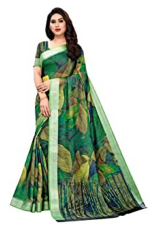

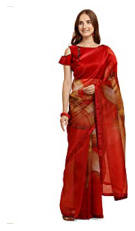

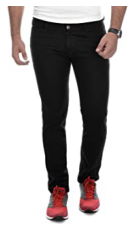

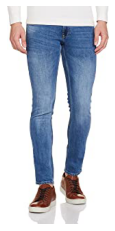

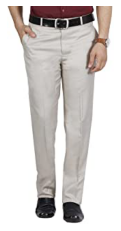

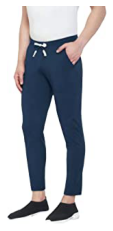

In [9]:
import matplotlib.image as mpimg
sharee_train=r'amazon_images/train/Sharees_women'
jeans_train=r'amazon_images/train/Jeans_men'
trouser_train=r'amazon_images/train/Trousers_men'

dir_train=[sharee_train,jeans_train,trouser_train]
for dirs in dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [20]:
#Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=150
nb_validation_samples=20
batch_size=8
epoch=10

In [21]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(train_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# test Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
test_generator=Data_gen.flow_from_directory(test_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 850 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [14]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 574, 574, 32)      896       
                                                                 
 activation (Activation)     (None, 574, 574, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 287, 287, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 287, 287, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 285, 285, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 285, 285, 32)      0         
                                                        

In [15]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [22]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=test_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.7464
Epoch 1: val_accuracy did not improve from 1.00000
18/18 [==============================] - 48s 3s/step - loss: 0.4832 - accuracy: 0.7464 - val_loss: 0.5566 - val_accuracy: 0.6250
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.8125
Epoch 2: val_accuracy did not improve from 1.00000
18/18 [==============================] - 54s 3s/step - loss: 0.4345 - accuracy: 0.8125 - val_loss: 0.3273 - val_accuracy: 0.9375
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.3731 - accuracy: 0.8333
Epoch 3: val_accuracy did not improve from 1.00000
18/18 [==============================] - 52s 3s/step - loss: 0.3731 - accuracy: 0.8333 - val_loss: 0.2182 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8264
Epoch 4: val_accuracy did not improve from 1.00000
18/18 [==========================

In [23]:
# Model Evaluation
evl=model.evaluate(test_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 1s 591ms/step - loss: 0.1977 - accuracy: 0.8750
Test Loss 0.1977010816335678
Test Accuracy 0.875


In [24]:
model.save('final_model.h5')

# Prediction of test images

Input Image is: img251.jpg


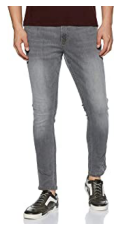

Predicted Label is: jeans

Input Image is: img252.jpg


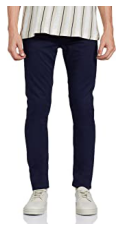

Predicted Label is: jeans

Input Image is: img253.jpg


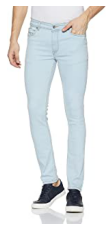

Predicted Label is: jeans

Input Image is: img254.jpg


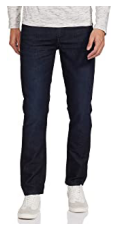

Predicted Label is: jeans

Input Image is: img255.jpg


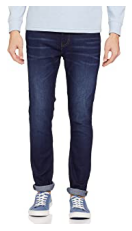

Predicted Label is: jeans

Input Image is: img256.jpg


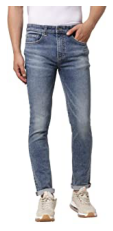

Predicted Label is: jeans

Input Image is: img257.jpg


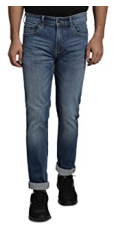

Predicted Label is: jeans

Input Image is: img258.jpg


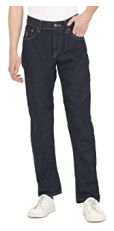

Predicted Label is: jeans

Input Image is: img259.jpg


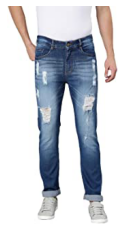

Predicted Label is: jeans

Input Image is: img260.jpg


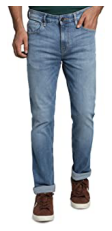

Predicted Label is: jeans

Input Image is: img261.jpg


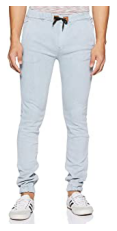

Predicted Label is: jeans

Input Image is: img262.jpg


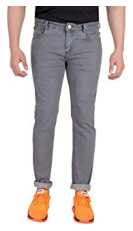

Predicted Label is: sarees

Input Image is: img263.jpg


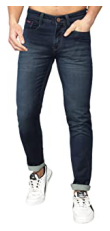

Predicted Label is: jeans

Input Image is: img264.jpg


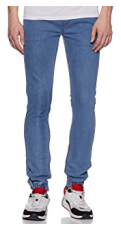

Predicted Label is: jeans

Input Image is: img265.jpg


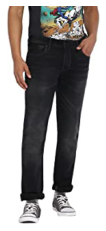

Predicted Label is: jeans

Input Image is: img266.jpg


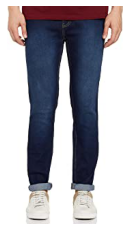

Predicted Label is: jeans

Input Image is: img267.jpg


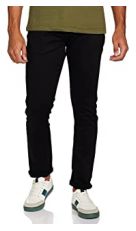

Predicted Label is: jeans

Input Image is: img268.jpg


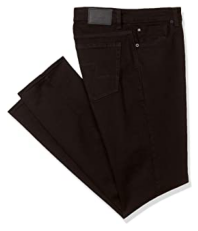

Predicted Label is: trouser

Input Image is: img269.jpg


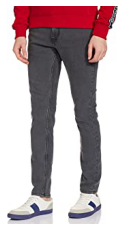

Predicted Label is: jeans

Input Image is: img270.jpg


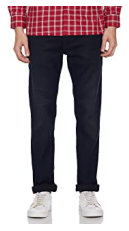

Predicted Label is: jeans

Input Image is: img271.jpg


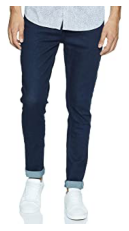

Predicted Label is: jeans

Input Image is: img272.jpg


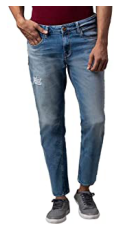

Predicted Label is: jeans

Input Image is: img273.jpg


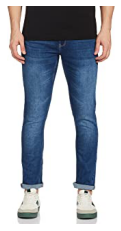

Predicted Label is: jeans

Input Image is: img274.jpg


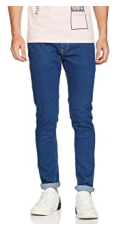

Predicted Label is: jeans

Input Image is: img275.jpg


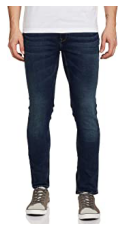

Predicted Label is: jeans

Input Image is: img276.jpg


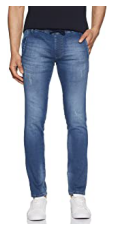

Predicted Label is: jeans

Input Image is: img277.jpg


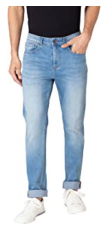

Predicted Label is: jeans

Input Image is: img278.jpg


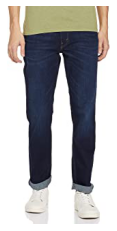

Predicted Label is: jeans

Input Image is: img279.jpg


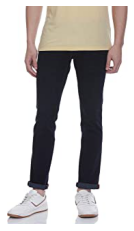

Predicted Label is: jeans

Input Image is: img280.jpg


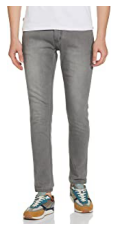

Predicted Label is: jeans

Input Image is: img281.jpg


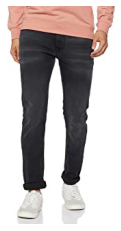

Predicted Label is: jeans

Input Image is: img282.jpg


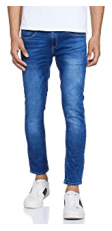

Predicted Label is: jeans

Input Image is: img283.jpg


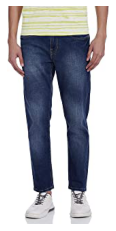

Predicted Label is: jeans

Input Image is: img284.jpg


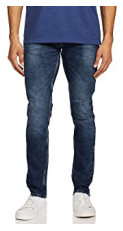

Predicted Label is: jeans

Input Image is: img285.jpg


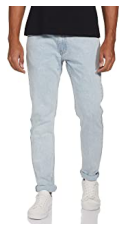

Predicted Label is: jeans

Input Image is: img286.jpg


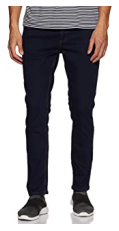

Predicted Label is: jeans

Input Image is: img287.jpg


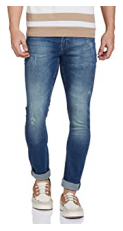

Predicted Label is: jeans

Input Image is: img288.jpg


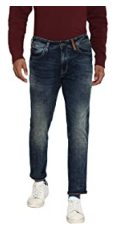

Predicted Label is: jeans

Input Image is: img289.jpg


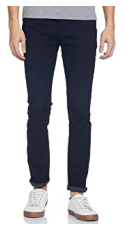

Predicted Label is: jeans

Input Image is: img290.jpg


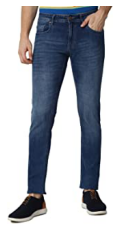

Predicted Label is: jeans

Input Image is: img291.jpg


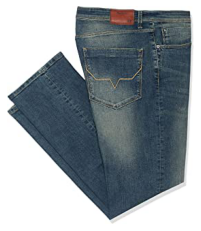

Predicted Label is: jeans

Input Image is: img292.jpg


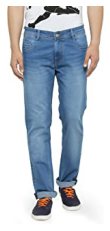

Predicted Label is: jeans

Input Image is: img293.jpg


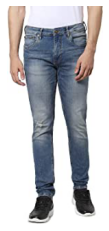

Predicted Label is: jeans

Input Image is: img294.jpg


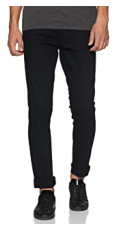

Predicted Label is: jeans

Input Image is: img295.jpg


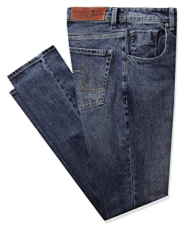

Predicted Label is: jeans

Input Image is: img296.jpg


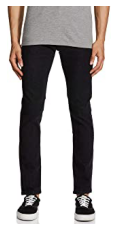

Predicted Label is: jeans

Input Image is: img297.jpg


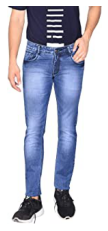

Predicted Label is: jeans

Input Image is: img298.jpg


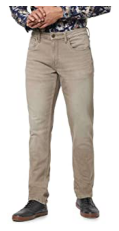

Predicted Label is: jeans

Input Image is: img299.jpg


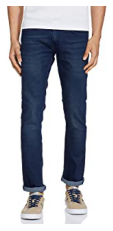

Predicted Label is: jeans

Input Image is: img300.jpg


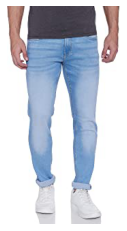

Predicted Label is: jeans

Input Image is: img251.jpg


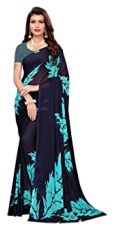

Predicted Label is: jeans

Input Image is: img252.jpg


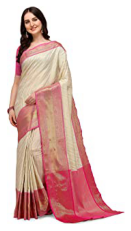

Predicted Label is: sarees

Input Image is: img253.jpg


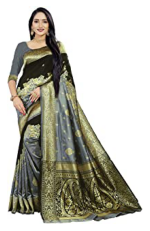

Predicted Label is: sarees

Input Image is: img254.jpg


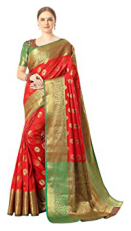

Predicted Label is: sarees

Input Image is: img255.jpg


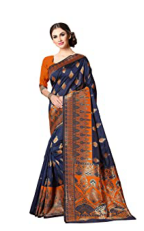

Predicted Label is: sarees

Input Image is: img256.jpg


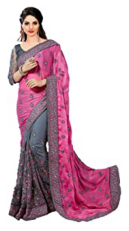

Predicted Label is: sarees

Input Image is: img257.jpg


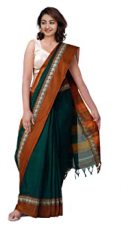

Predicted Label is: sarees

Input Image is: img258.jpg


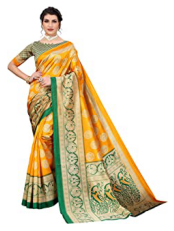

Predicted Label is: sarees

Input Image is: img259.jpg


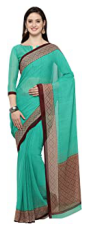

Predicted Label is: sarees

Input Image is: img260.jpg


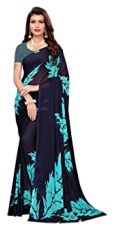

Predicted Label is: jeans

Input Image is: img261.jpg


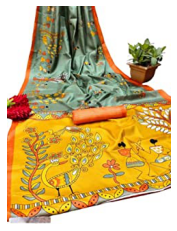

Predicted Label is: sarees

Input Image is: img262.jpg


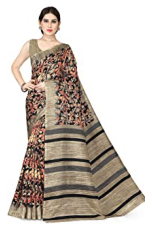

Predicted Label is: sarees

Input Image is: img263.jpg


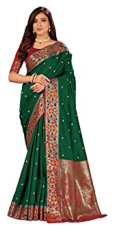

Predicted Label is: sarees

Input Image is: img264.jpg


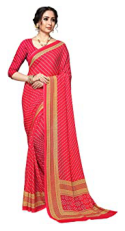

Predicted Label is: sarees

Input Image is: img265.jpg


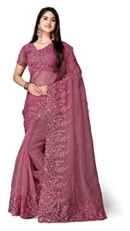

Predicted Label is: sarees

Input Image is: img266.jpg


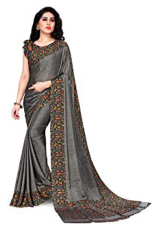

Predicted Label is: trouser

Input Image is: img267.jpg


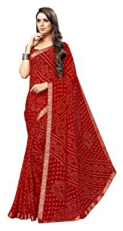

Predicted Label is: sarees

Input Image is: img268.jpg


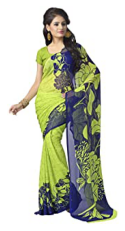

Predicted Label is: sarees

Input Image is: img269.jpg


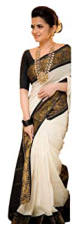

Predicted Label is: sarees

Input Image is: img270.jpg


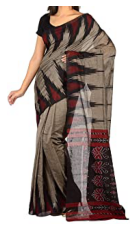

Predicted Label is: sarees

Input Image is: img271.jpg


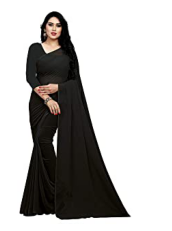

Predicted Label is: jeans

Input Image is: img272.jpg


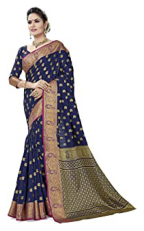

Predicted Label is: sarees

Input Image is: img273.jpg


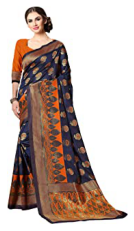

Predicted Label is: sarees

Input Image is: img274.jpg


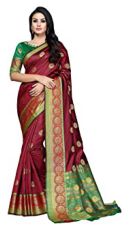

Predicted Label is: sarees

Input Image is: img275.jpg


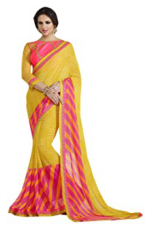

Predicted Label is: sarees

Input Image is: img276.jpg


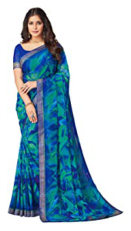

Predicted Label is: sarees

Input Image is: img277.jpg


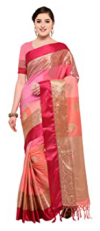

Predicted Label is: sarees

Input Image is: img278.jpg


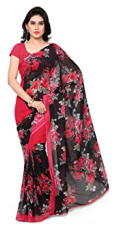

Predicted Label is: sarees

Input Image is: img279.jpg


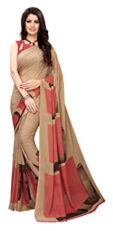

Predicted Label is: sarees

Input Image is: img280.jpg


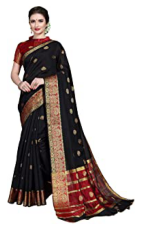

Predicted Label is: sarees

Input Image is: img281.jpg


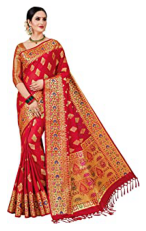

Predicted Label is: sarees

Input Image is: img282.jpg


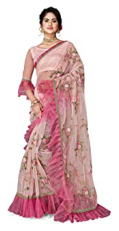

Predicted Label is: sarees

Input Image is: img283.jpg


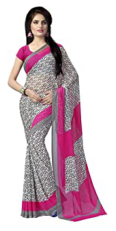

Predicted Label is: sarees

Input Image is: img284.jpg


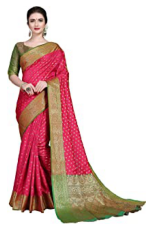

Predicted Label is: sarees

Input Image is: img285.jpg


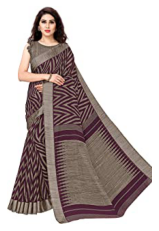

Predicted Label is: sarees

Input Image is: img286.jpg


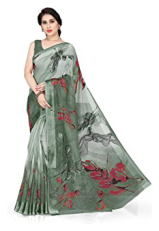

Predicted Label is: sarees

Input Image is: img287.jpg


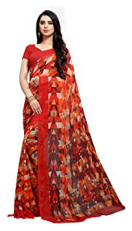

Predicted Label is: sarees

Input Image is: img288.jpg


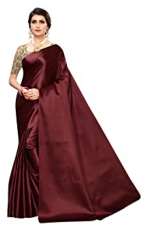

Predicted Label is: sarees

Input Image is: img289.jpg


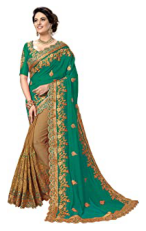

Predicted Label is: sarees

Input Image is: img290.jpg


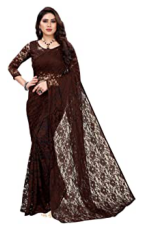

Predicted Label is: sarees

Input Image is: img291.jpg


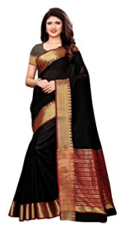

Predicted Label is: sarees

Input Image is: img292.jpg


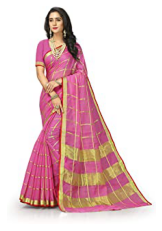

Predicted Label is: sarees

Input Image is: img293.jpg


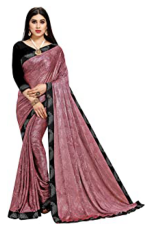

Predicted Label is: sarees

Input Image is: img294.jpg


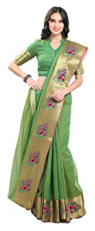

Predicted Label is: sarees

Input Image is: img295.jpg


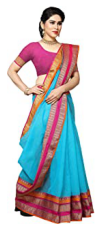

Predicted Label is: sarees

Input Image is: img296.jpg


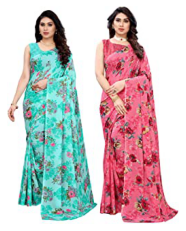

Predicted Label is: sarees

Input Image is: img297.jpg


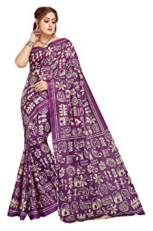

Predicted Label is: jeans

Input Image is: img298.jpg


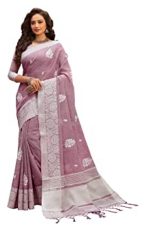

Predicted Label is: jeans

Input Image is: img299.jpg


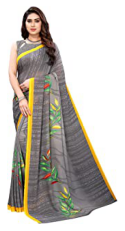

Predicted Label is: sarees

Input Image is: img300.jpg


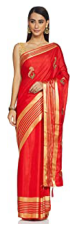

Predicted Label is: sarees

Input Image is: img251.jpg


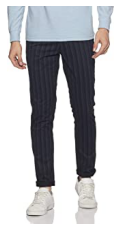

Predicted Label is: jeans

Input Image is: img252.jpg


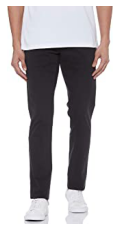

Predicted Label is: jeans

Input Image is: img253.jpg


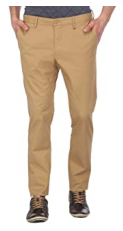

Predicted Label is: trouser

Input Image is: img254.jpg


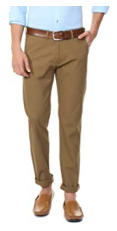

Predicted Label is: trouser

Input Image is: img255.jpg


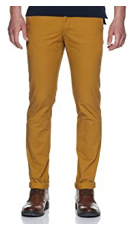

Predicted Label is: trouser

Input Image is: img256.jpg


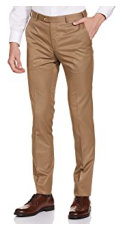

Predicted Label is: trouser

Input Image is: img257.jpg


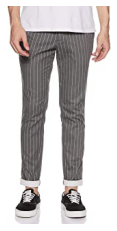

Predicted Label is: jeans

Input Image is: img258.jpg


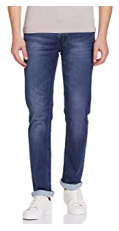

Predicted Label is: jeans

Input Image is: img259.jpg


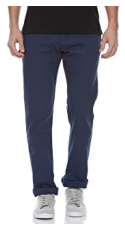

Predicted Label is: jeans

Input Image is: img260.jpg


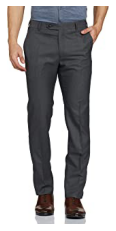

Predicted Label is: jeans

Input Image is: img261.jpg


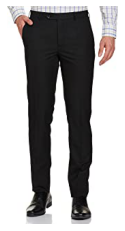

Predicted Label is: jeans

Input Image is: img262.jpg


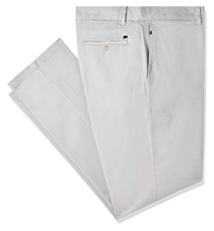

Predicted Label is: trouser

Input Image is: img263.jpg


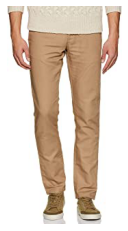

Predicted Label is: trouser

Input Image is: img264.jpg


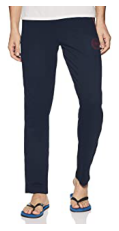

Predicted Label is: jeans

Input Image is: img265.jpg


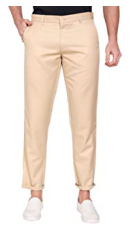

Predicted Label is: jeans

Input Image is: img266.jpg


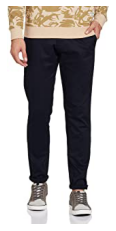

Predicted Label is: jeans

Input Image is: img267.jpg


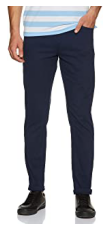

Predicted Label is: jeans

Input Image is: img268.jpg


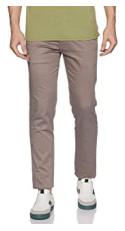

Predicted Label is: jeans

Input Image is: img269.jpg


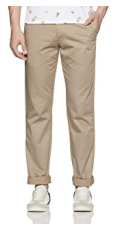

Predicted Label is: jeans

Input Image is: img270.jpg


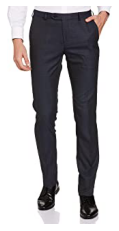

Predicted Label is: jeans

Input Image is: img271.jpg


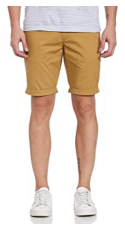

Predicted Label is: trouser

Input Image is: img272.jpg


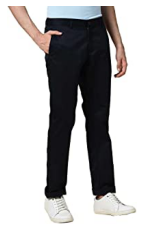

Predicted Label is: jeans

Input Image is: img273.jpg


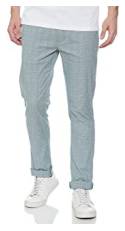

Predicted Label is: jeans

Input Image is: img274.jpg


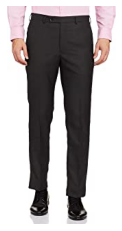

Predicted Label is: jeans

Input Image is: img275.jpg


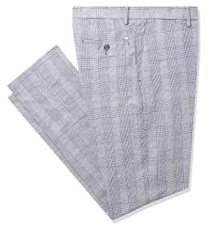

Predicted Label is: trouser

Input Image is: img276.jpg


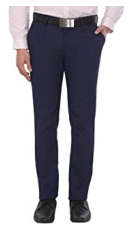

Predicted Label is: jeans

Input Image is: img277.jpg


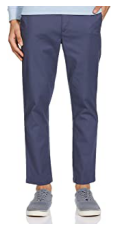

Predicted Label is: jeans

Input Image is: img278.jpg


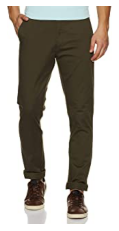

Predicted Label is: jeans

Input Image is: img279.jpg


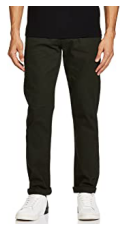

Predicted Label is: jeans

Input Image is: img280.jpg


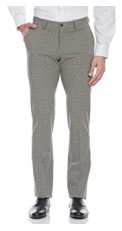

Predicted Label is: jeans

Input Image is: img281.jpg


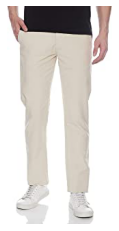

Predicted Label is: jeans

Input Image is: img282.jpg


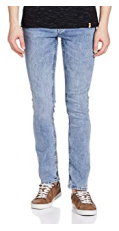

Predicted Label is: trouser

Input Image is: img283.jpg


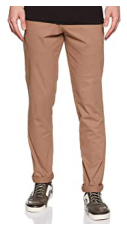

Predicted Label is: trouser

Input Image is: img284.jpg


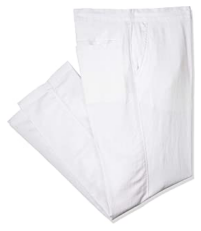

Predicted Label is: trouser

Input Image is: img285.jpg


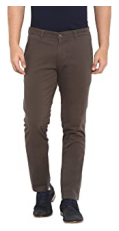

Predicted Label is: jeans

Input Image is: img286.jpg


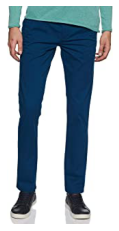

Predicted Label is: jeans

Input Image is: img287.jpg


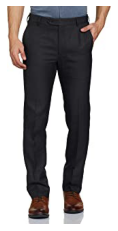

Predicted Label is: jeans

Input Image is: img288.jpg


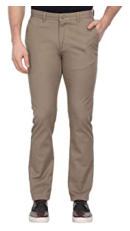

Predicted Label is: jeans

Input Image is: img289.jpg


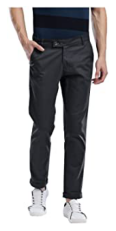

Predicted Label is: jeans

Input Image is: img290.jpg


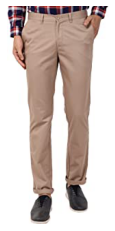

Predicted Label is: trouser

Input Image is: img291.jpg


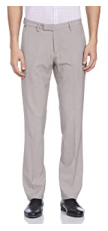

Predicted Label is: jeans

Input Image is: img292.jpg


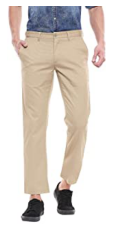

Predicted Label is: jeans

Input Image is: img293.jpg


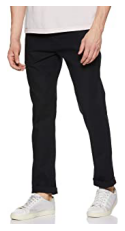

Predicted Label is: jeans

Input Image is: img294.jpg


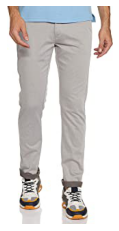

Predicted Label is: jeans

Input Image is: img295.jpg


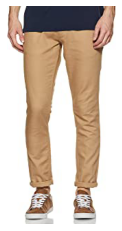

Predicted Label is: trouser

Input Image is: img296.jpg


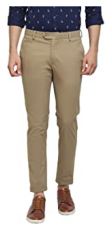

Predicted Label is: trouser

Input Image is: img297.jpg


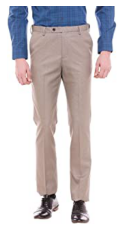

Predicted Label is: trouser

Input Image is: img298.jpg


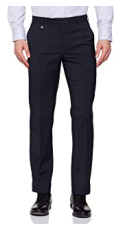

Predicted Label is: trouser

Input Image is: img299.jpg


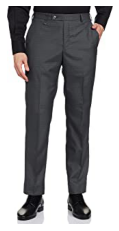

Predicted Label is: trouser

Input Image is: img300.jpg


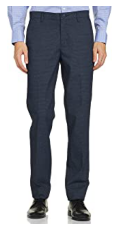

Predicted Label is: jeans



In [28]:
#Predicted samples of the test images
test_jeans=r"amazon_images/test/Jeans_men"
test_Sharees=r"amazon_images/test/Sharees_women"
test_trouser=r"amazon_images/test/Trousers_men"


Predicted_class=[]
classes=[test_jeans,test_Sharees,test_trouser]
for test_dir in classes:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(576, 576))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Predicted Label is: jeans\n")
            Predicted_class.append("Jeans (men)")
        elif final==1:
            print("Predicted Label is: sarees\n")
            Predicted_class.append("Sarees (women)")
        elif final==2:
            print("Predicted Label is: trouser\n")
            Predicted_class.append("Trousers (men)")

# Completed